GD Eout: 0.22  SGD Eout: 0.473


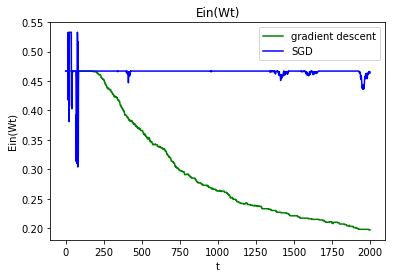

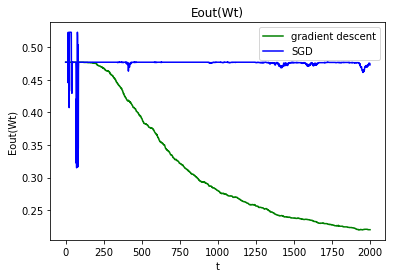

In [3]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt
%matplotlib inline

def InputData(fName):
    f=open(fName)
    text=f.readlines()
    X=[]
    Y=[]
    c=0
    for r in text:
        row=r.strip()
        row=row.replace('\t',' ')
        l=row.split(' ')
        X.append(l)
    f.close()
    X=np.array(X)
#     print(X.shape)
    X=X.astype(float)
    X,Y=np.split(X,[len(X[0])-1],axis=1)
    X=np.concatenate((np.ones((len(X),1)),X),axis=1)
    return X,Y

def sigmoid(S):
    return (1/(1+np.exp(-S))).reshape((len(S),1))

def ErrorMeasure(X_t,W_t,Y_t):
    E=0
    Y_per=sigmoid(np.dot(X_t,W_t))
    for i in range(len(Y_t)):
        if Y_per[i]>0.5:
            y=1
        else:
            y=-1
        if y!=Y_t[i]:
            E+=1
    E/=len(Y_t)
    return E

X,Y=InputData('hw3_train.dat')
X_test,Y_test=InputData('hw3_test.dat')
l_rate=0.01
l_rate2=0.001
N=len(Y)
W=np.zeros(X.shape[1])
W_SGD=np.zeros(X.shape[1])
Y=Y.reshape((len(Y)))
Ein_his=[]
Ein_SGD_his=[]
Eout_his=[]
Eout_SGD_his=[]
Iteration=2000
for t in range(Iteration):
    S=-np.dot(X,W)*Y
#     print(S.shape,Y.shape)
    grad=np.mean(-np.multiply(X,Y.reshape((N),1))*sigmoid(S),axis=0)
    W=W-l_rate*grad
    Ein_his.append(ErrorMeasure(X,W,Y))
    Eout_his.append(ErrorMeasure(X_test,W,Y_test))
    
    S_SGD=-np.dot(X[t%N],W_SGD)*Y[t%N]
    grad_SGD=-np.multiply(X[t%N],Y[t%N])*(1/(1+np.exp(-S_SGD)))
    W_SGD=W_SGD-l_rate2*grad_SGD
    Ein_SGD_his.append(ErrorMeasure(X,W_SGD,Y))
    Eout_SGD_his.append(ErrorMeasure(X_test,W_SGD,Y_test))
    
Eout=ErrorMeasure(X_test,W,Y_test)
Eout_SGD=ErrorMeasure(X_test,W_SGD,Y_test)
print('GD Eout:',Eout,' SGD Eout:',Eout_SGD)
f1=plt.figure()
# plt.subplot(2,1,1)
plt.title('Ein(Wt)')
plt.xlabel('t')
plt.ylabel('Ein(Wt)')
x=np.arange(Iteration)
plt.plot(x,Ein_his,color='green',label="gradient descent")
plt.plot(x,Ein_SGD_his,color='blue',label="SGD")
plt.legend(loc='best')

f2=plt.figure()
# plt.subplot(2,1,2)
plt.title('Eout(Wt)')
plt.xlabel('t')
plt.ylabel('Eout(Wt)')
plt.plot(x,Eout_his,color='green',label="gradient descent")
plt.plot(x,Eout_SGD_his,color='blue',label="SGD")
plt.legend(loc='best')
plt.show()